# Unveiling Trends in Bank Customer Characteristics by Segmentation.

### Dataset description

The dataset was fetched from a Portuguese banking institution, and was donated in 2012. Our goal is to group bank customers based on their occupation and to know their similarities and differences when it comes to having personal loans, weather they have defaulted on a credit before, and to know their level of education including their age. Initially, the dataset was used to predict weather a customer will subscribe to a term deposit but thats not our focus. The dataset has a total of 17 columns and over 45,000 rows or records.

| Feature   | Description                                            |
|-----------|--------------------------------------------------------|
| Age       | Age of the customer                                    |
| Job       | Occupation or job of the customer                      |
| Marital   | Marital status of the customer                          |
| Education | Level of education gotten by the customer            |
| Default   | Shows whether the customer has defaulted on a credit |
| Housing   | Shows whether the customer has a housing loan       |
| Loan      | Shows whether the customer has a personal loan      |
| Balance   | Customer's individual balance                           |
| Contact   | Kind of communication used to contact the customer      |
| Month     | Last contact month of the year                          |
| Day       | Last contact day of the week                             |
| Duration  | Duration of the last contact in seconds                  |
| Campaign  | Number of contacts made during this marketing campaign for this client |
| Pdays     | Number of days that have passed since the customer was last contacted from a previous campaign |
| Previous  | Number of contacts made before this campaign for this client |
| Poutcome  | Outcome of the previous marketing campaign               |
| Y         | Shows whether the customer has subscribed to a term deposit |

Source: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
# Importing for 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

In [2]:
# Loading the dataset and showing the head
bank_data = pd.read_csv("bank-full.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Lets describe our data
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Shape of dataset
bank_data.shape

(45211, 17)

From the observation here, we have a maximum age of 95 and a minimum age of 18. It also showed us the average age of the bank customers which is 40.9. The highest money balance in an account is 102,127 Euros and the minimum money found in -8019; which shows the customer is on serious debt.

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


If we'd notice on the data, the missing values are not recorded as the standard way, NaN but rather inputed as "unknown." We will replace the unknowns in the data with NaN so as to properly replace with a measure of central tendencies.

In [6]:
bank_data = bank_data.replace("unknown", np.NaN)

In [7]:
bank_data.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

From the missing values, we can see we have a huge amount of missing values of 'poutcome' column so we will be dropping the entire column. We have missing values from a categorical columns called "contact", "job", "education" so we will replace them by the most frequent "modal."

In [8]:
bank_data = bank_data.drop("poutcome", axis=1)

In [9]:
# Replacing missing values of "job", "education" and "contact"
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
cat_imputer = cat_imputer.fit(bank_data[['job', 'education', 'contact']])
bank_data[['job', 'education', 'contact']] = cat_imputer.transform(bank_data[['job', 'education', 'contact']])

In [10]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

We have successfully cleaned our dataset

#### Visualization of our job column

/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


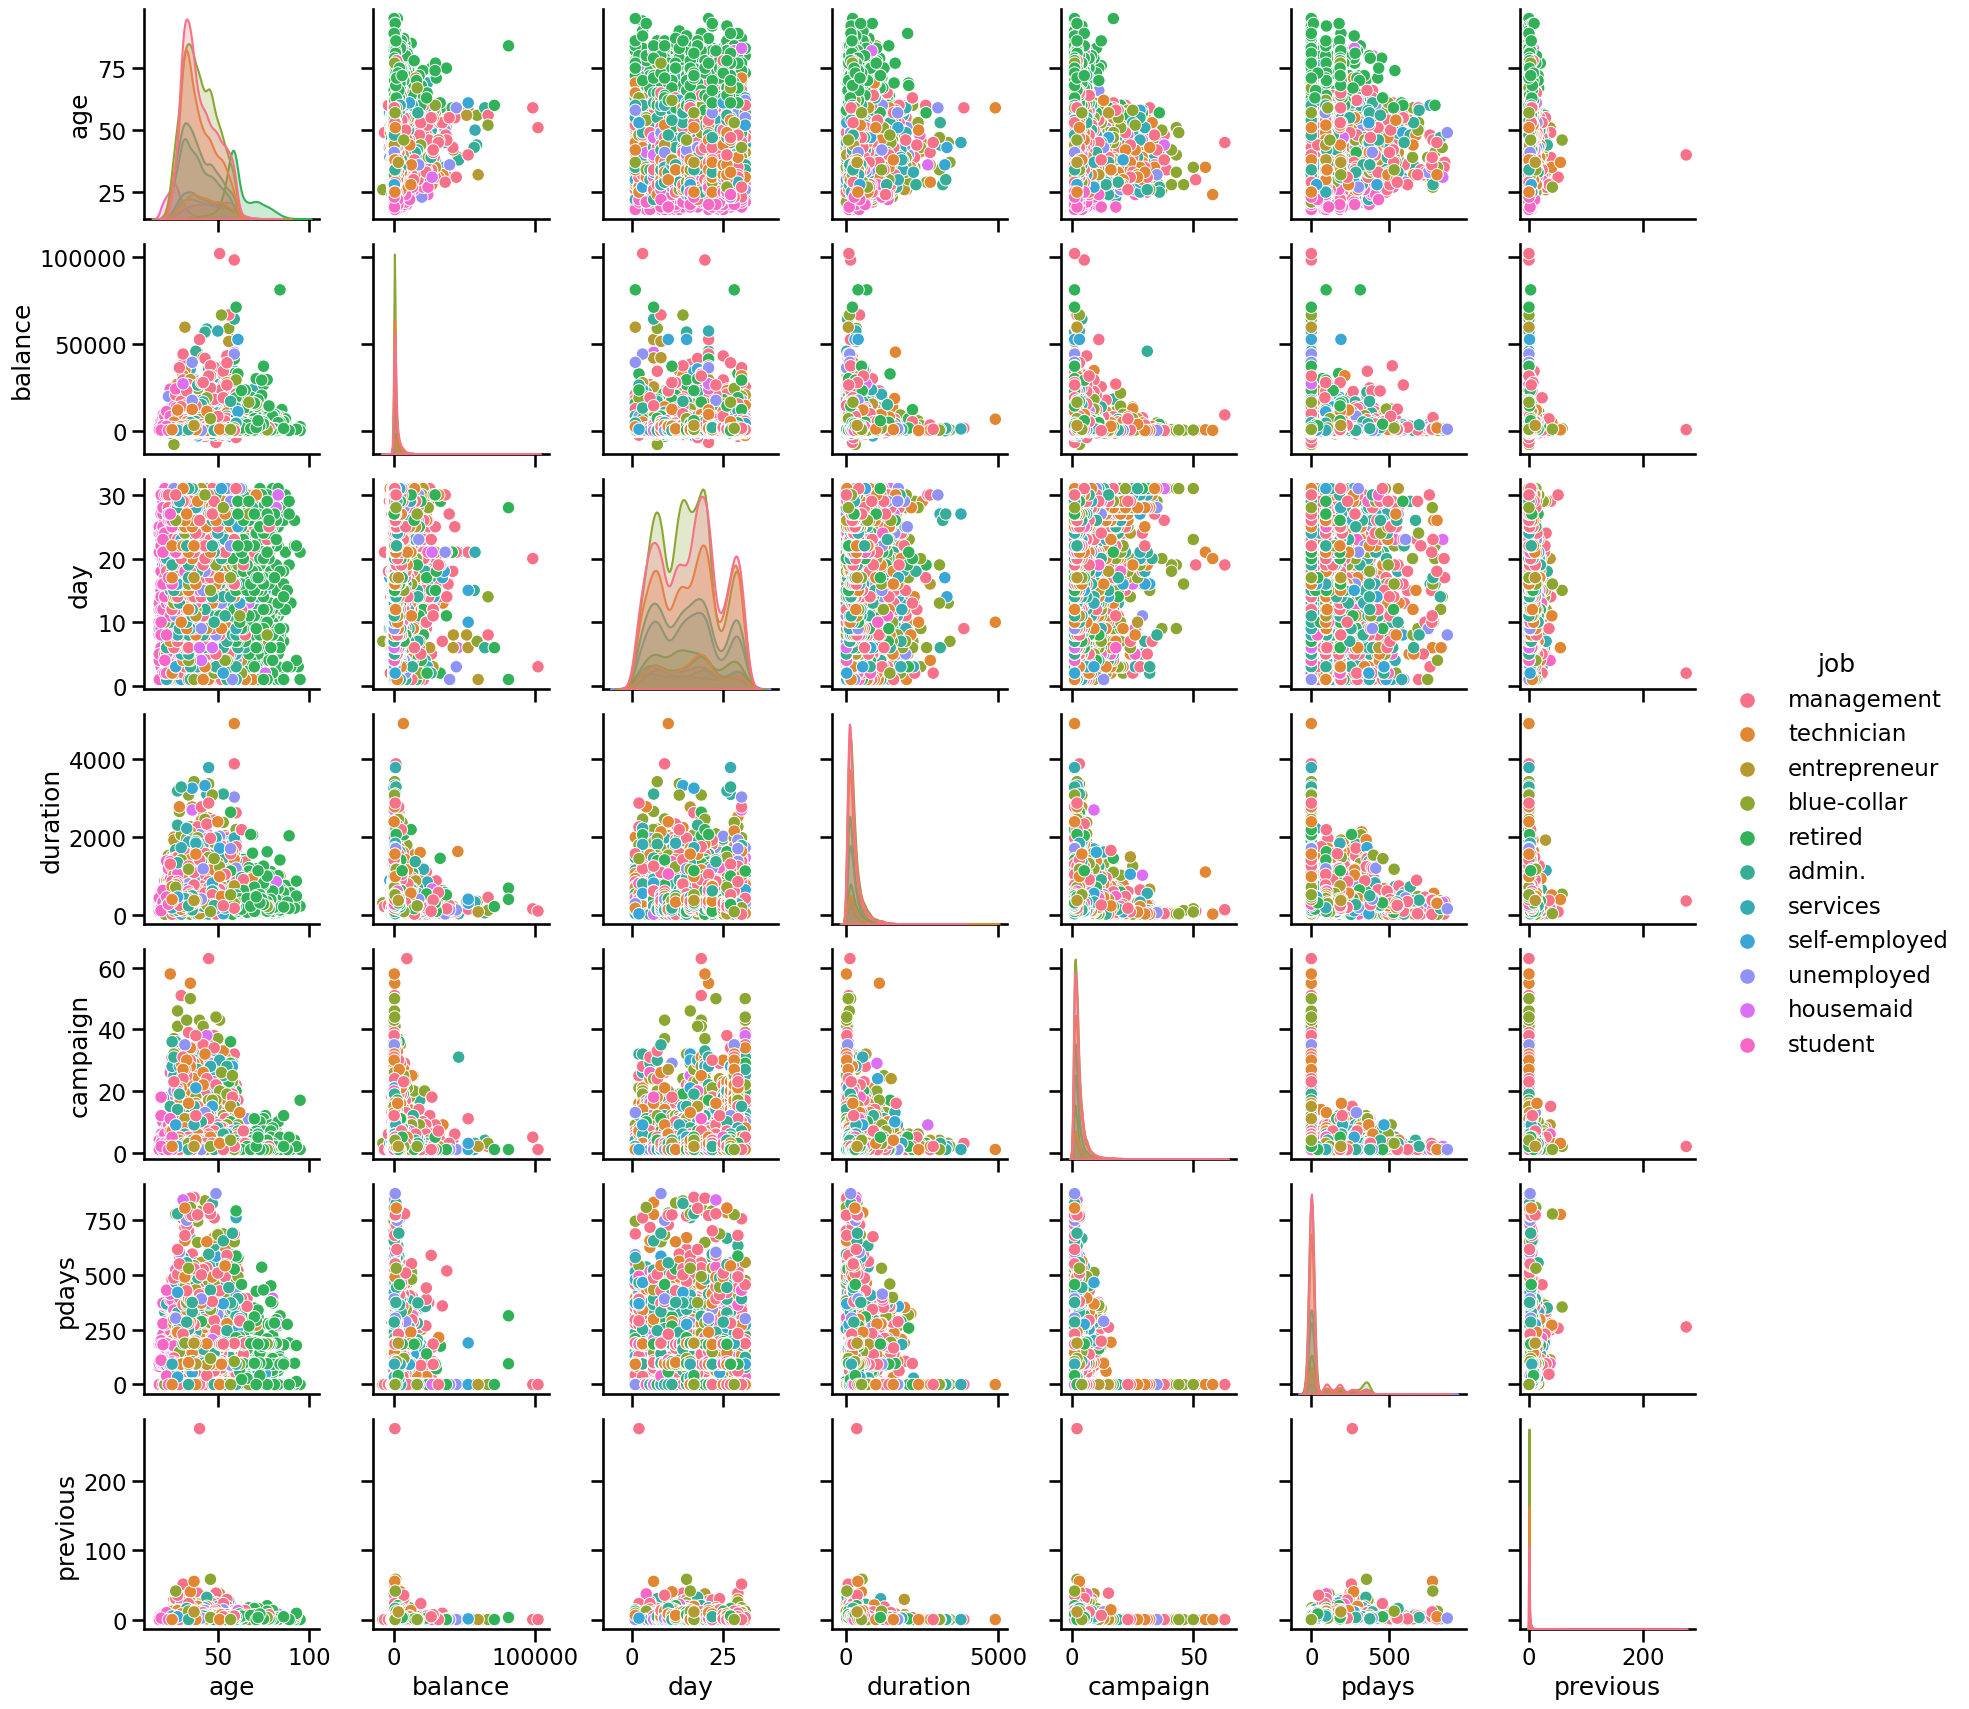

In [11]:
# Lets visualize our dataset with a pairplot
sns.set_context('talk')
sns.pairplot(bank_data, hue='job')

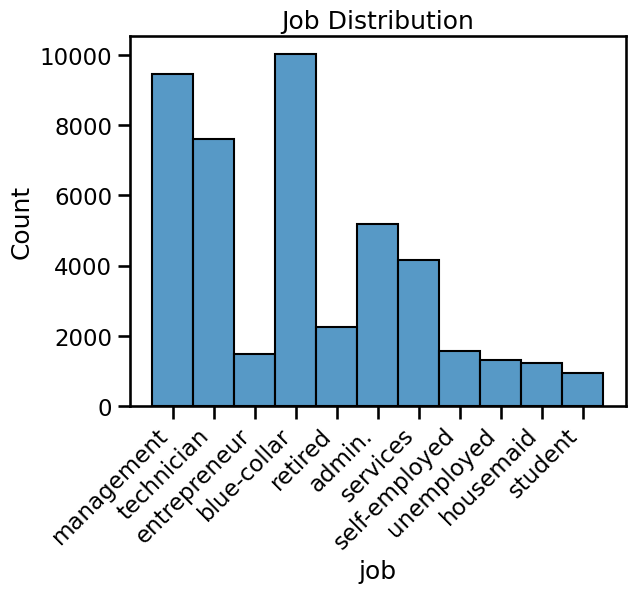

In [12]:
sns.histplot(bank_data.job)
plt.title("Job Distribution")
plt.xticks(rotation = 45, ha = "right")
plt.show()

We have a huge amount of bank customers that are doing blue collar jobs. Those in management jobs and technicians are also having substantial amount. Students on the other hand, have the lowest people as bank customers.

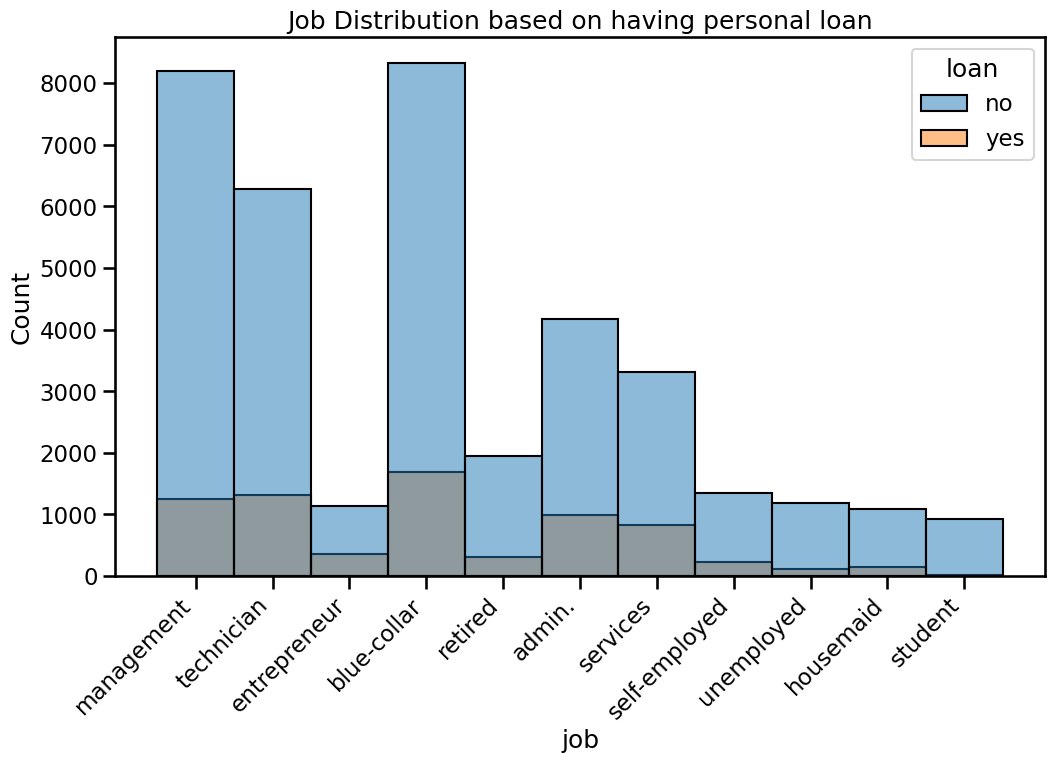

In [13]:
plt.figure(figsize=(12, 7))
plt.title("Job Distribution based on having personal loan")
sns.histplot(x = "job", hue = "loan", data = bank_data)
plt.xticks(rotation = 45, ha = "right")
plt.show()

Here, over 6000 bank customers with a management and blue-collar jobs doesn't have a personal loan while, over a thousand have personal loans. Majority of bank customers that are student also doesn't have a personal loan while with just few of them with a personal loan.

#### Data Preprocessing

##### Converting ordinal categorical variable to numerical variable

In [14]:
# Converting the ordinal categorical variables, "education" and "month"
from sklearn.preprocessing import LabelEncoder

In [15]:
label_enc = LabelEncoder()

ordinal_columns = ["education", "month"]

bank_data[ordinal_columns] = bank_data[ordinal_columns].apply(lambda col: label_enc.fit_transform(col))

##### Converting categorical variable to numerical variable with One-Hot Encoding

In [16]:
# Converting the categorical variables "job", "marital", "default", "housing", "loan", "contact" and "y"
from sklearn.preprocessing import OneHotEncoder

In [17]:
one_hot = OneHotEncoder(sparse = False, drop = 'first')

cat_columns = ["job", "marital", "default", "housing", "loan", "contact", "y"]

encoded = one_hot.fit_transform(bank_data[cat_columns])
col_name = one_hot.get_feature_names_out(cat_columns)
bank_data_encoded = pd.DataFrame(encoded, columns = col_name)

/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
bank_data_encoded

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
bank_data = pd.concat([bank_data, bank_data_encoded], axis = 1)

In [20]:
bank_data = bank_data.drop(columns = cat_columns, axis = 1)

In [21]:
bank_data

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes
0,58,2,2143,5,8,261,1,-1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,1,29,5,8,151,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,33,1,2,5,8,76,1,-1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,47,1,1506,5,8,92,1,-1,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33,1,1,5,8,198,1,-1,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,825,17,9,977,3,-1,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,0,1729,17,9,456,2,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,1,5715,17,9,1127,5,184,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,57,1,668,17,9,508,4,-1,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


After encoding, our columns increased from the initial 16 to 26 columns

In [22]:
no_one_hot_encode = ['age', 'balance', 'education', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous']
yes_one_hot_encode = [col for col in bank_data.columns if col not in no_one_hot_encode]

##### Detecting and removing outliers

In [23]:
# Lets aggregate our encoded columns and prepare for outlier removal
agg = bank_data[yes_one_hot_encode].groupby(bank_data.index).mean()

In [24]:
# Lets merge our aggregated encoded columns with the rest of the columns
new_bank_data = pd.merge(bank_data[no_one_hot_encode],
                         agg,
                         left_index = True,
                         right_index = True
                        )

In [25]:
# Using Z-score with a threshold of 3 to detect outlier
from scipy.stats import zscore

In [26]:
zscore_ = zscore(new_bank_data)

mask = (zscore_.abs() > 3).any(axis = 1)
cleaned_data = new_bank_data[~mask]

##### Feature Selection

In [27]:
from sklearn.feature_selection import VarianceThreshold

In [28]:
variance_selector = VarianceThreshold(threshold = 0)
selected_fs = variance_selector.fit_transform(cleaned_data)

print(f"{cleaned_data.shape[1] - selected_fs.shape[1]} features have been removed, {selected_fs.shape[1]} features remain")

9 features have been removed, 17 features remain


##### Feature Scaling

In [29]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
transformed_data = transformer.fit_transform(selected_fs)

In [30]:
transformed_data

array([[ 1.75444182,  0.69418387,  1.25570606, ...,  0.83340814,
        -0.43961316, -0.3264292 ],
       [ 0.57835023, -0.54486369, -0.32827834, ...,  0.83340814,
        -0.43961316, -0.3264292 ],
       [ 0.86330148,  0.36003907, -0.32827834, ...,  0.83340814,
        -0.43961316, -0.3264292 ],
       ...,
       [-0.5603026 , -0.18011417, -0.32827834, ..., -1.19989228,
        -0.43961316,  3.06345142],
       [-1.96878514, -0.21228781, -0.32827834, ..., -1.19989228,
         2.27472719,  3.06345142],
       [ 1.21256273, -0.01991269,  1.25570606, ..., -1.19989228,
        -0.43961316,  3.06345142]])

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 2)
X = pca.fit_transform(transformed_data)

print(pca.explained_variance_ratio_)
pca_data_frame = pd.DataFrame(data = X, columns = ["Dimension_1","Dimension_2"])
pca_data_frame

[0.14541592 0.12244851]


,Dimension_1,Dimension_2
0,0.167874,0.309818
1,0.438644,-0.870705
2,-2.143352,0.623370
3,-0.075421,-0.768328
4,0.480552,-0.177875
...,...,...
26798,0.740910,-0.486508
26799,2.447802,3.942698
26800,1.433839,-0.482872
26801,1.695589,-0.997763


In [33]:
# Sum of the explained variance ratio
print(sum(pca.explained_variance_ratio_))

0.2678644341640225


Approximately 20% of the total variance in our data is accounted for by the two dimensions that we have retained.

#### K-Means Clustering

In [34]:
# Using elbow method, we will find the number of K
from sklearn.cluster import KMeans

/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1

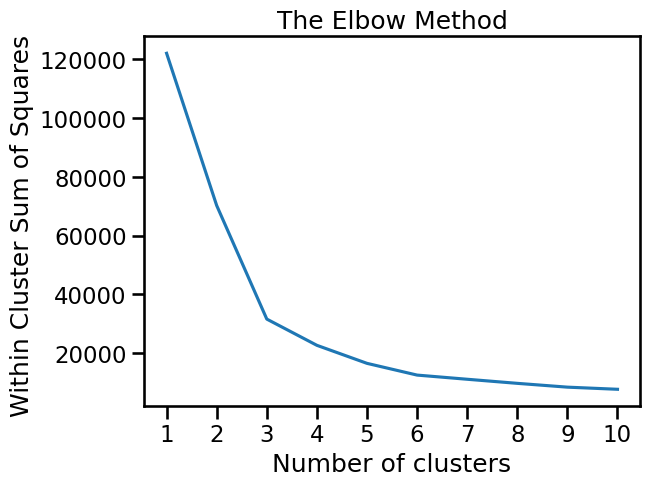

In [35]:
wcss = list()

for y in range(1,11):
    kmeans = KMeans(n_clusters = y, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Squares ")
plt.xticks(range(1, 11))
plt.show()

From the elbow image, we can see the best K lies in 3. So K = 3

In [36]:
# Fitting the kmeans
kmeans_ = KMeans(n_clusters=3)
clust_label_ = kmeans_.fit_predict(X)
centroids = kmeans_.cluster_centers_

pca_kmeans = pd.concat([pca_data_frame, pd.DataFrame({'cluster':kmeans_.labels_})], axis=1)

/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


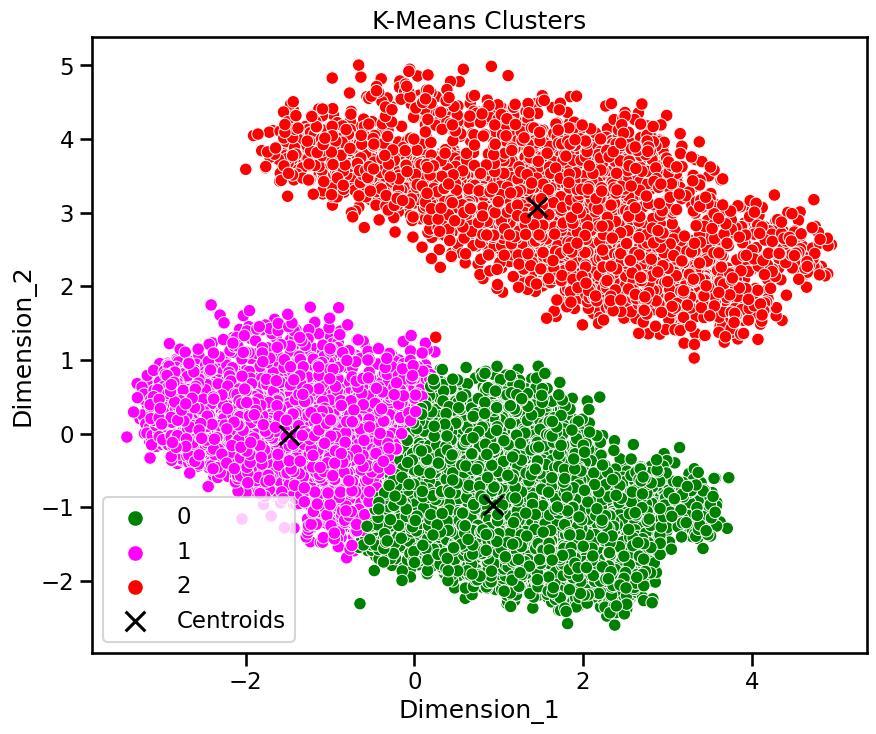

In [37]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x = "Dimension_1", y = "Dimension_2", hue = "cluster", data = pca_kmeans, palette=['green','magenta', 'red'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 200, c = 'black', label='Centroids')
plt.title("K-Means Clusters")
plt.legend()
plt.show()

In [38]:
### Silhouette Score Average
from sklearn.metrics import silhouette_score

silhouette_score_avg = silhouette_score(X, clust_label_)
print(silhouette_score_avg)

0.5204860828547128


In [39]:
bank_data['kmeans_col'] = pca_kmeans['cluster']
bank_data.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col
0,58,2,2143,5,8,261,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,44,1,29,5,8,151,1,-1,0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,33,1,2,5,8,76,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,47,1,1506,5,8,92,1,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,33,1,1,5,8,198,1,-1,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# for the first cluster
first_cluster = bank_data[bank_data['kmeans_col'] == 0]
first_cluster

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col
0,58,2,2143,5,8,261,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,44,1,29,5,8,151,1,-1,0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,47,1,1506,5,8,92,1,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,33,1,1,5,8,198,1,-1,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,35,2,231,5,8,139,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26797,36,2,943,20,9,115,3,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26798,31,2,6290,20,9,303,2,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26800,36,2,75,20,9,97,2,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26801,54,0,3859,20,9,104,3,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
first_cluster.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col
count,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,...,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.0
mean,41.426603,1.104865,1243.228355,16.444548,5.643987,251.413931,3.210240,2.443188,0.061575,0.239156,...,0.176220,0.022283,0.645348,0.233883,0.024579,0.539633,0.206583,0.052900,0.050774,0.0
std,9.443466,0.655107,2824.067526,7.978011,2.469543,260.618449,3.676118,23.221763,0.556681,0.426587,...,0.381024,0.147608,0.478428,0.423317,0.154845,0.498448,0.404871,0.223844,0.219545,0.0
min,20.000000,0.000000,-6847.000000,1.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,34.000000,1.000000,32.250000,9.000000,5.000000,99.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,40.000000,1.000000,365.000000,17.000000,6.000000,170.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,49.000000,2.000000,1293.000000,22.000000,8.000000,301.000000,4.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,61.000000,2.000000,66653.000000,31.000000,10.000000,3881.000000,43.000000,197.000000,15.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [42]:
# for the second cluster
second_cluster = bank_data[bank_data['kmeans_col'] == 1]
second_cluster

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col
2,33,1,2,5,8,76,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,42,2,2,5,8,380,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,43,1,593,5,8,55,1,-1,0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
10,41,1,270,5,8,222,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12,53,1,6,5,8,517,1,-1,0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26767,54,0,10374,20,9,283,2,189,2,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
26772,47,1,3533,20,9,319,1,100,2,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
26776,52,1,7119,20,9,871,3,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
26784,33,0,925,20,9,884,3,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
second_cluster.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col
count,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,...,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.0
mean,40.811442,1.082516,1154.765372,16.648815,6.008376,257.459009,3.155231,0.200143,0.020763,0.265372,...,0.177330,0.021119,0.629478,0.250312,0.024060,0.624220,0.170112,0.026288,0.044734,1.0
std,9.469415,0.648814,2819.121592,8.334129,2.509428,258.945789,3.711040,13.687026,0.296755,0.441551,...,0.381965,0.143788,0.482966,0.433212,0.153242,0.484345,0.375748,0.159997,0.206728,0.0
min,20.000000,0.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,33.000000,1.000000,32.250000,9.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,40.000000,1.000000,344.000000,17.000000,6.000000,178.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,48.000000,2.000000,1194.750000,23.000000,8.000000,316.000000,4.000000,-1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,61.000000,2.000000,98417.000000,31.000000,10.000000,3366.000000,63.000000,191.000000,11.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [44]:
# for the third cluster
third_cluster = bank_data[bank_data['kmeans_col'] == 2]
third_cluster

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col
15533,42,2,1736,21,5,179,2,-1,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
15548,33,2,255,21,5,75,2,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
15555,37,2,-86,21,5,91,4,-1,0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
15556,27,1,-403,21,5,54,3,-1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
15558,44,1,4842,21,5,322,4,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26792,38,1,96,20,9,151,3,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
26793,54,1,641,20,9,399,2,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
26794,40,0,1527,20,9,317,2,-1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
26796,32,1,5075,20,9,90,2,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0


In [45]:
third_cluster.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col
count,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.0
mean,42.111169,1.243264,1608.946639,19.655245,4.934345,239.329584,3.367512,12.153021,0.244311,0.159299,...,0.215538,0.026157,0.665184,0.218153,0.022234,0.420874,0.177086,0.086843,0.059901,2.0
std,9.170057,0.657796,3370.783682,6.791921,3.462913,257.221133,3.814808,44.096552,1.263940,0.366003,...,0.411249,0.159624,0.471988,0.413046,0.147463,0.493764,0.381791,0.281641,0.237334,0.0
min,22.000000,0.000000,-2604.000000,4.000000,1.000000,5.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,34.000000,1.000000,56.000000,17.000000,1.000000,91.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,41.000000,1.000000,516.000000,19.000000,5.000000,156.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,50.000000,2.000000,1784.000000,24.000000,9.000000,287.500000,4.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0
max,61.000000,2.000000,66721.000000,31.000000,10.000000,4918.000000,44.000000,198.000000,37.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


#### Hierarchical Clustering

In [46]:
import scipy.cluster.hierarchy as sch

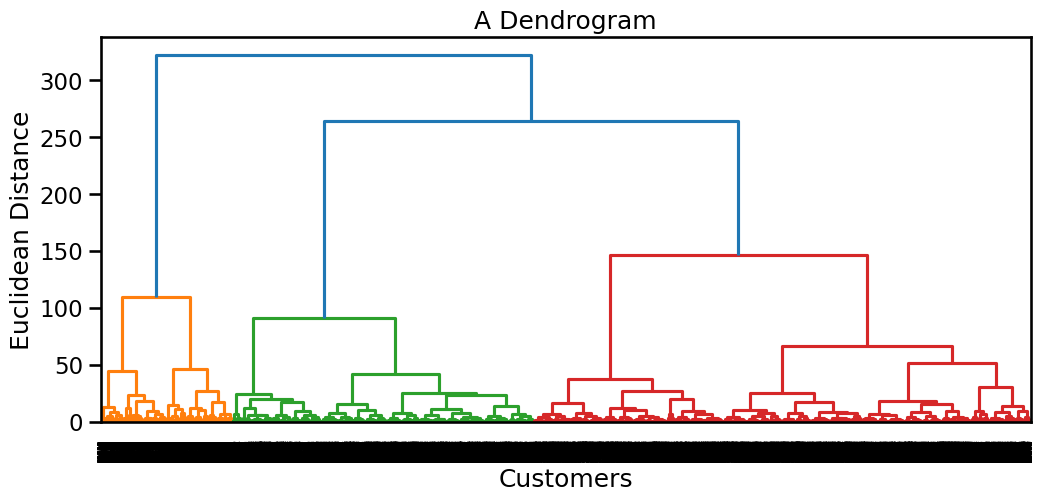

In [47]:
plt.figure(figsize = (12,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("A Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

From our dendrogram, we can see we have 3 clusters.

In [48]:
# Fitting our clusters
from sklearn.cluster import AgglomerativeClustering

In [49]:
hiera_cluster = AgglomerativeClustering(n_clusters = 3,
                                        affinity = 'euclidean',
                                        linkage = 'ward'
                                       )
y_hiera_cluster = hiera_cluster.fit_predict(X)

/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [50]:
clusters_mean = pd.DataFrame(X).groupby(y_hiera_cluster).mean()

pca_hiera = pd.DataFrame(X, columns=["Dimension_1", "Dimension_2"])
pca_hiera["cluster"] = y_hiera_cluster

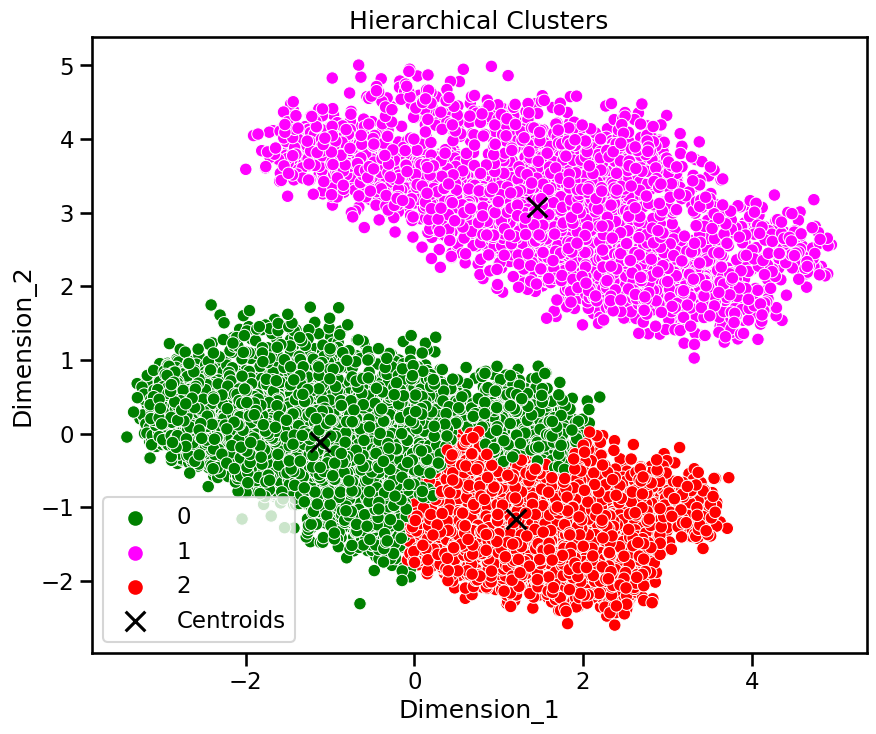

In [51]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x = "Dimension_1", y = "Dimension_2", hue = "cluster", data = pca_hiera, palette=['green', 'magenta', 'red'])
plt.scatter(clusters_mean.iloc[:, 0], clusters_mean.iloc[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.title("Hierarchical Clusters")
plt.legend()
plt.show()

In [52]:
# Calculate silhouette average
silhouette_score_avg = silhouette_score(X, y_hiera_cluster)
print(silhouette_score_avg)

0.4805170296299508


In [53]:
bank_data['hierar_col'] = pca_hiera['cluster']
bank_data.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col,hierar_col
0,58,2,2143,5,8,261,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,44,1,29,5,8,151,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,33,1,2,5,8,76,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,47,1,1506,5,8,92,1,-1,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,33,1,1,5,8,198,1,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [54]:
# for the first cluster
first_hierar_cluster = bank_data[bank_data['hierar_col'] == 0]
first_hierar_cluster

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col,hierar_col
0,58,2,2143,5,8,261,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,33,1,2,5,8,76,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,47,1,1506,5,8,92,1,-1,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,42,2,2,5,8,380,1,-1,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
9,43,1,593,5,8,55,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26776,52,1,7119,20,9,871,3,-1,0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
26779,59,1,12270,20,9,180,2,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26784,33,0,925,20,9,884,3,-1,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26788,36,1,655,20,9,986,6,-1,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
first_hierar_cluster.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col,hierar_col
count,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,...,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.00000,14319.000000,14319.000000,14319.0
mean,40.922201,1.093233,1184.625183,16.704728,5.955793,256.593826,3.164537,0.826175,0.030240,0.258677,...,0.020462,0.631119,0.248621,0.023535,0.607235,0.175292,0.03017,0.045045,0.783854,0.0
std,9.456916,0.649203,2798.304933,8.260984,2.536630,261.290390,3.705648,16.838676,0.354752,0.437923,...,0.141580,0.482518,0.432229,0.151601,0.488382,0.380230,0.17106,0.207410,0.411799,0.0
min,20.000000,0.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,33.000000,1.000000,34.000000,9.000000,5.000000,102.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.0
50%,40.000000,1.000000,352.000000,17.000000,6.000000,176.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.0
75%,48.000000,2.000000,1241.000000,23.000000,8.000000,314.000000,4.000000,-1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.0
max,61.000000,2.000000,98417.000000,31.000000,10.000000,3881.000000,63.000000,196.000000,14.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,0.0


In [56]:
# for the second cluster
second_hierar_cluster = bank_data[bank_data['hierar_col'] == 1]
second_hierar_cluster

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col,hierar_col
15533,42,2,1736,21,5,179,2,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
15548,33,2,255,21,5,75,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
15555,37,2,-86,21,5,91,4,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
15556,27,1,-403,21,5,54,3,-1,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
15558,44,1,4842,21,5,322,4,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26792,38,1,96,20,9,151,3,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
26793,54,1,641,20,9,399,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
26794,40,0,1527,20,9,317,2,-1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
26796,32,1,5075,20,9,90,2,-1,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0


In [57]:
second_hierar_cluster.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col,hierar_col
count,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,...,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.0,3822.0
mean,42.110152,1.243066,1609.469126,19.655678,4.933281,239.315018,3.367870,12.156463,0.244375,0.159079,...,0.026164,0.665097,0.218210,0.021978,0.420984,0.177132,0.086866,0.059916,2.0,1.0
std,9.171041,0.657768,3371.069907,6.792757,3.462741,257.253213,3.815243,44.101808,1.264099,0.365798,...,0.159645,0.472018,0.413085,0.146631,0.493782,0.381831,0.281675,0.237363,0.0,0.0
min,22.000000,0.000000,-2604.000000,4.000000,1.000000,5.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.0
25%,34.000000,1.000000,56.000000,17.000000,1.000000,91.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.0
50%,41.000000,1.000000,516.500000,19.000000,5.000000,156.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.0
75%,50.000000,2.000000,1784.000000,24.000000,9.000000,287.000000,4.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0,1.0
max,61.000000,2.000000,66721.000000,31.000000,10.000000,4918.000000,44.000000,198.000000,37.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0,1.0


In [58]:
# for the third cluster
third_hierar_cluster = bank_data[bank_data['hierar_col'] == 2]
third_hierar_cluster

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col,hierar_col
1,44,1,29,5,8,151,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,33,1,1,5,8,198,1,-1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,35,2,231,5,8,139,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
6,28,2,447,5,8,217,1,-1,0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
8,58,0,121,5,8,50,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,59,2,5314,20,9,116,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
26797,36,2,943,20,9,115,3,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
26798,31,2,6290,20,9,303,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
26800,36,2,75,20,9,97,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


In [59]:
third_hierar_cluster.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,kmeans_col,hierar_col
count,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,...,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.0,8662.0
mean,41.463981,1.095244,1225.308243,16.279266,5.601016,250.687832,3.214385,2.209882,0.060494,0.240937,...,0.023782,0.648349,0.230778,0.025745,0.537405,0.211037,0.055992,0.052413,0.0,2.0
std,9.458068,0.656992,2860.450757,7.967805,2.410555,257.315252,3.672433,22.541623,0.572057,0.427677,...,0.152378,0.477513,0.421355,0.158382,0.498628,0.408068,0.229919,0.222871,0.0,0.0
min,21.000000,0.000000,-6847.000000,1.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
25%,33.000000,1.000000,30.000000,9.000000,5.000000,99.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
50%,40.000000,1.000000,357.000000,17.000000,6.000000,170.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,2.0
75%,49.000000,2.000000,1240.750000,21.000000,8.000000,300.000000,4.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,2.0
max,61.000000,2.000000,66653.000000,31.000000,10.000000,3322.000000,43.000000,197.000000,15.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,2.0


### Cluster Analysis in K-Means

#### Cluster 1: The Established Couples
The first cluster contains a group that is distinguished by its stability and dedication. With a mean age of 41.4, these clientele are mostly married, indicating a feeling of financial responsibility. With an acceptable average balance, they participate in more campaigns, preferring short to medium call durations. Their preferred communication method is cellular, and their housing and loan choices are spread out.

#### Cluster 2: The Emerging Independents
Moving on to the second cluster, we find a slightly younger demographic with an average age of 40.8. This category, which includes people of various marital statuses, has a moderate financial situation with a balance comparable to the first. Their campaign participation is consistent with the first cluster, with a preference for shorter call durations. Cellular communication is prioritised, and one prominent trait is a higher probability of owning a mortgage.

#### Cluster Three: The Savvy and Diverse Investors
With a mean age of 42.1, the last cluster reveals a somewhat older and more educated consumer. They stand out financially with a greater average balance. Campaign participation is reasonable, and communication choices range among cellphone and telephone mediums. Marital status reflects a mix of partnered and unmarried people, whereas housing loan trends show a higher likelihood than the first two groupings.